<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Measuring Drop Spreading Law

Dominik Szablonski<br>
University of Manchester  
February2025

We first initialise our Python interpreter

In [1]:
import matplotlib.pyplot as plt
import string
from math import *
import numpy as np

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

In [2]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

Let's plot this data to see what it looks like:

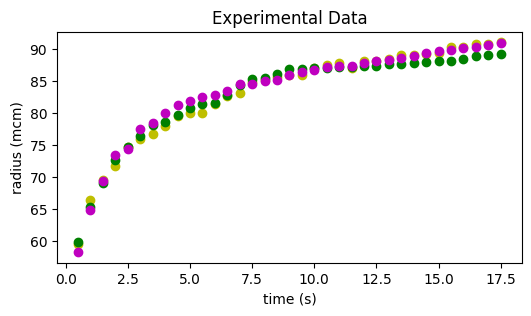

In [3]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# plotting data from experimental runs 1-3:
plt.plot(time, radius_data1, "yo")
plt.plot(time, radius_data2, "go")
plt.plot(time, radius_data3, "mo")
# setting axis labels & figures 
plt.xlabel("time (s)")
plt.ylabel("radius (mcm)")
plt.title("Experimental Data")
# displaying the plot
plt.show()

Let us combine the data and find the mean on each point in time, and their corresponding error (standard deviation).

In [4]:
# combine data into one array
combined_data = np.array([radius_data1, radius_data2, radius_data3])

print(combined_data)

radius_mean = np.mean(combined_data, axis=0)
radius_error = np.std([radius_data1, radius_data2, radius_data3], axis=0)

[[59.513027 66.368389 69.506166 71.700852 74.735925 76.007795 76.695256
  78.039551 79.598386 80.075493 80.079624 81.495363 82.598934 83.172805
  84.91944  85.155809 85.718415 85.920147 86.000243 87.120934 87.507943
  87.786892 87.060409 88.086562 88.113767 88.436448 89.082172 89.139957
  89.210538 89.356928 90.312937 90.406557 90.754907 90.88941  91.096467]
 [59.810888 65.360919 69.088934 72.594631 74.694093 76.440186 78.133942
  78.618537 79.753566 80.745559 81.422723 81.634563 82.861597 84.335873
  85.362055 85.537714 86.159399 86.873675 86.918131 87.003533 87.126402
  87.15544  87.224911 87.394479 87.433936 87.626938 87.701465 87.834029
  87.963874 88.153147 88.20988  88.542036 88.86527  89.082038 89.214132]
 [58.200029 64.826353 69.332991 73.504694 74.295033 77.506575 78.413291
  79.952682 81.339708 81.938359 82.528196 82.807452 83.378999 84.521468
  84.507216 85.064265 85.247146 85.900079 86.475709 86.776052 87.15881
  87.343755 87.448085 87.822712 88.140434 88.311032 88.619312 8

Let's now plot the mean experimental data with errors.

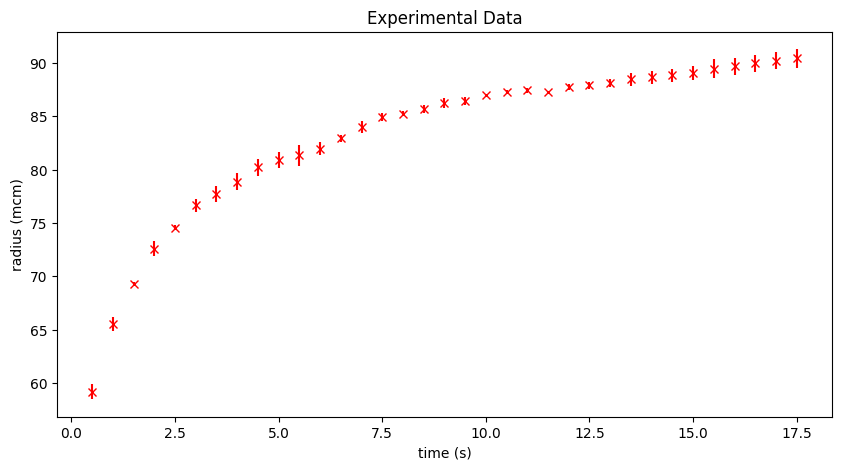

In [5]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (10,5)
plt.figure()
# plotting mean radius data against time with error bars
plt.errorbar(time, radius_mean, fmt="rx", yerr=radius_error)
# setting axis labels & figures 
plt.xlabel("time (s)")
plt.ylabel("radius (mcm)")
plt.title("Experimental Data")
# displaying the plot
plt.show()

![](./img/bee.png)
## Extracting Quantities Using Experimental Data

In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. 

To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ should be found.

Using the numpy cubic formula, and writing

$$H^3 + 3R^2H - \frac{6}{\pi}V = 0$$

we can obtain values of $H$ for each value of $R$ by using `np.roots`.

In [6]:
VOLUME = 7.6e3 # constant volume, in mcm^3

def height(radius):
    '''
    Returns height for a given an array of radii.

    Parameters
    ---------- 
    radius : numpy array
        Array containing radius values.

    Returns
    -------
    height_array : numpy array
        Array of height values for each corresponding value in radius.
    '''
    height_array = np.empty(0)
    
    for i in radius:
        polynomial = [1, 0, 3*i**2, -(6/np.pi)*VOLUME]
        
        roots = np.roots(polynomial)
        
        # keep real part of root where imaginary component is arbitrarily
        # small (i.e., keep only the real roots)
        roots = roots.real[abs(roots.imag)<1e-5]
        
        height_array = np.append(height_array, roots)
        

    height_array = np.float64(height_array)
    
    return height_array

We can generate an array of heights for each radius data set, then take a mean height and find the erro by taking a standard deviation.

In [7]:
# generate height data
height_data1 = height(radius_data1)
height_data2 = height(radius_data2)
height_data3 = height(radius_data3)

# combine height data into a single array
height = np.array([height_data1, height_data2, height_data3])

# obtain mean and standard deviation
mean_height = np.mean(height, axis=0)
error_height = np.std(height, axis=0)

We can now find the contact angle for each data set, given by,

$$\theta = \frac{\pi}{2} - \arctan\left(\frac{R^2 - H^2}{2RH}\right)$$

In [8]:
def angle(radius, height):
    '''
    Computes the contact angle for given radius and height data.
    
    Parameters
    ----------
    radius : numpy array
        Array containing radius values.
    height : numpy array
        Array containing height values.

    Returns
    -------
    theta : numpy array
        Array of contact angle values for each corresponding value of height
        and radius.
    '''
    theta = ((np.pi/2) - np.arctan((radius**2 - height**2)/(2*radius*height)))
    return theta

We can now generate the contact angle for each data set, compute their means and generate errors by standard deviation.

In [9]:
# Generate contact angle for each radius and height dataset
contact_angle1 = angle(radius_data1, height_data1)
contact_angle2 = angle(radius_data2, height_data2)
contact_angle3 = angle(radius_data3, height_data3)

# Combine contact angle data into a single array
combined_angle = np.array([contact_angle1, contact_angle2, contact_angle3])

# Compute the mean and standard deviation
mean_contact_angle = np.mean(combined_angle, axis=0)
contact_angle_error = np.std(combined_angle, axis=0)

Let's plot what these results look like, first relating $\theta$ to $t$.

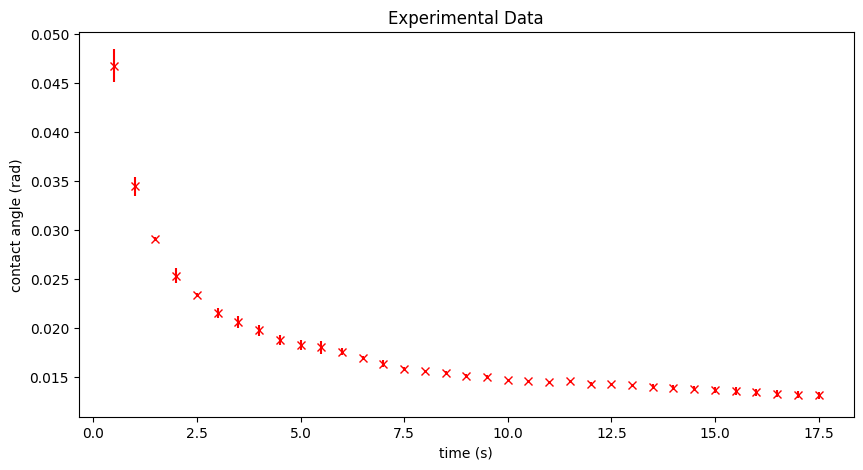

In [10]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (10,5)
plt.figure()

# plotting mean contact angle against time with errors
plt.errorbar(time, mean_contact_angle, fmt="rx", yerr=contact_angle_error)

# setting axis labels & figures 
plt.xlabel("time (s)")
plt.ylabel(r"contact angle (rad)")
plt.title("Experimental Data")
# displaying the plot
plt.show()

We will create a function to compute $U$.

In [11]:
def U(radius, t=time):
    '''
    Computes the speed of the contact line by taking the difference 
    between neighbouring radius points and dividing them by the time
    difference between them.

    Parameters
    ----------
    radius : numpy array
        Array containing radius values.
    t : numpy array
        Array containing times corresponding to each radius. The default
        is "time".

    Returns
    -------
    velocity : numpy array
        Array containing velocity data.
    '''
    radius_difference = np.abs((np.diff(radius)))
    time_difference = np.abs((np.diff(t)))
    
    velocity = radius_difference/time_difference
    
    return velocity

Let us compute the speed over time for each data set, and find the mean and standard deviation of the speed.

In [12]:
# computing velocity for each data set
velocity_data1 = U(radius_data1)
velocity_data2 = U(radius_data2)
velocity_data3 = U(radius_data3)

# combining velocity data into a single array
combined_velocity = np.array([velocity_data1, velocity_data2, velocity_data3])

# calculating the mean and standard deviation
mean_velocity = np.mean(combined_velocity, axis=0)
error_velocity = np.std(combined_velocity, axis=0)

The data $U=U(\theta)$ obtained for each of the three experimental runs is used to estimate the relationship between the mean contact line speed and the mean contact angle, and the corresponding errors on those.

We will first prepare the data by dropping the last value on the contact angle and its error so that the sizes of the velocity data set and the angle data set is the same

In [13]:
# Drop the last value on the mean contact angle so sizes match.
mean_contact_angle = np.delete(mean_contact_angle, -1)
contact_angle_error = np.delete(contact_angle_error,-1)

We will now plot the $U$ data vs. the $\theta$ data below. 

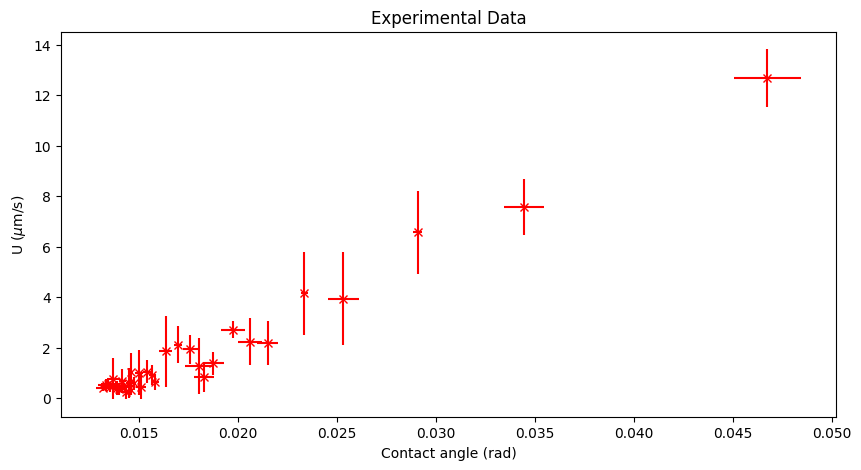

In [14]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (10,5)
plt.figure()

# plotting velocity vs. mean contact angle with corresponding errors
plt.errorbar(mean_contact_angle, mean_velocity, fmt="rx", xerr=contact_angle_error, yerr=error_velocity)

# setting axis labels & figures 
plt.xlabel(r"Contact angle (rad)")
plt.ylabel(r"U ($\mu$m/s)")
plt.title("Experimental Data")

# displaying the plot
plt.show()

![](./img/bee.png)
## Fitting Spreading Laws

We will now attemp to fit the Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) and the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) to the mean data $U=U(\theta)$ ploted above, where $U_0$ is termed the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). To avoid using nonlinear least square method, we will fit a straight line to the data $U=U(\theta^2)$ and $U=U(\theta^3)$. This will produce the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$, but it will not give the values of the equilibrium contact angle $\theta_0^{fit}$. Instead, $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ will be found, from which $\theta_0$ can be comupted. The corresponding error $\delta\theta^{fit}$ should be found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

We first process the data and propagate errors, by squaring and cubing it, and propagating errors, by

$$\sigma_{\theta^2} = 2\theta\sigma_{\theta}$$
$$\sigma_{\theta^3} = 3\theta^2\sigma_{\theta}$$

In [15]:
angle_quad = mean_contact_angle**2
angle_cube = mean_contact_angle**3

angle_error_quad = 2*mean_contact_angle*contact_angle_error
angle_error_cube = 3*(mean_contact_angle**2)*contact_angle_error

We now fit the data to a straight line via `np.polyfit`. We obtain variance (i.e., $\sigma^2$) from the diagonals of the covariance matrix produced by the fitting algoirthm.

In [16]:
quad_fit = np.polyfit(angle_quad, mean_velocity, 1, cov = True)
cube_fit = np.polyfit(angle_cube, mean_velocity, 1, cov = True)

quad_parameters = quad_fit[0]
cube_parameters = cube_fit[0]

quad_fit_errors = np.sqrt(np.diag(quad_fit[1]))
cube_fit_errors = np.sqrt(np.diag(cube_fit[1]))

We will now display the corresponding fits.

Below is de Gennes law.

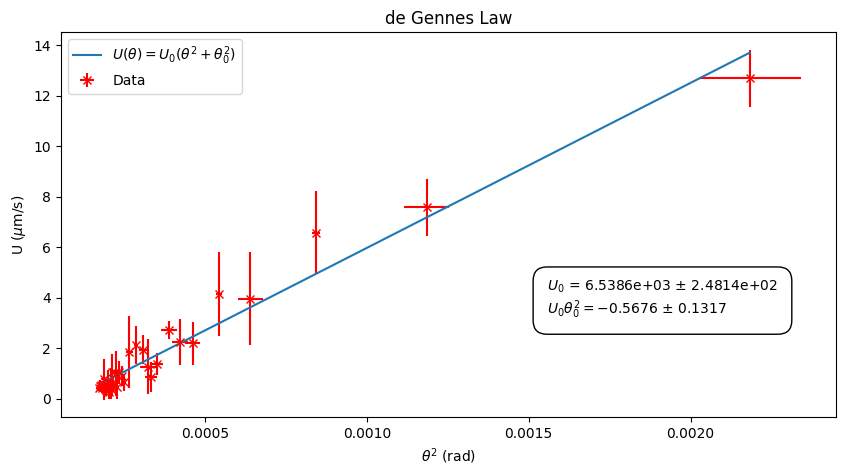

In [17]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (10,5)
plt.figure()

# plotting speed data vs. angle squared data with corresponding error bars
plt.errorbar(angle_quad, mean_velocity, fmt="rx", xerr=angle_error_quad, yerr=error_velocity, label=r"Data")

# plotting the de Genne's Law vs angle squared
plt.plot(angle_quad, np.polyval(quad_parameters, angle_quad), label = r"$U(\theta) = U_0(\theta^2 + \theta_0^2)$")

# setting axis labels & figures 
plt.xlabel(r"$\theta^2$ (rad)")
plt.ylabel(r"U ($\mu$m/s)")

# setting title
plt.title("de Gennes Law")

# annotating plot with fit parameters
plt.annotate((fr"$U_0$ = {quad_parameters[0]:6.4e} $\pm$ {quad_fit_errors[0]:6.4e}"
              "\n"
            rf"$U_0\theta_0^2 = {quad_parameters[1]:6.4f}$ $\pm$ {quad_fit_errors[1]:6.4f}"), (0, 0), (350, 100),
                            xycoords='axes fraction', va='top',
                            textcoords='offset points', fontsize='10',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
# displaying legend
plt.legend()

# displaying the plot
plt.show()

Below is the plot for the Cox-Voinov law.

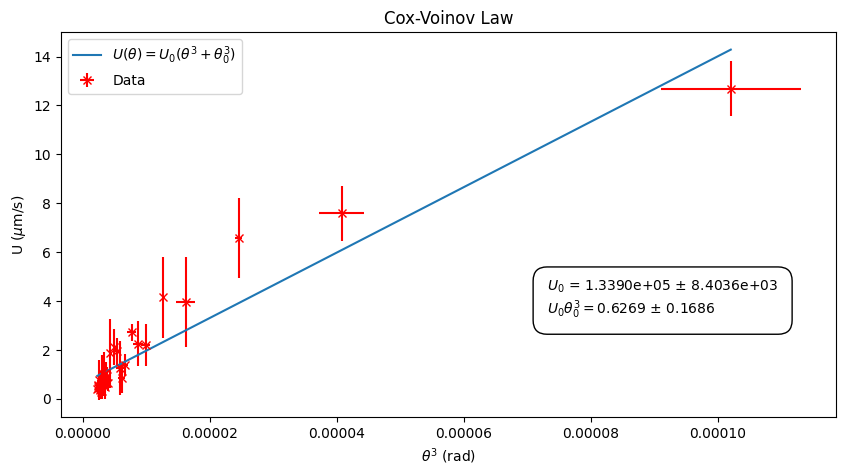

In [18]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (10,5)
plt.figure()

# plotting speed data vs. angle cubed data with corresponding error bars
plt.errorbar(angle_cube, mean_velocity, fmt="rx", xerr=angle_error_cube, yerr=error_velocity, label="Data")

# plotting the Cox-Voinov law vs. angle cubed.
plt.plot(angle_cube, np.polyval(cube_parameters, angle_cube), label = r"$U(\theta) = U_0(\theta^3 + \theta_0^3)$")

# setting axis labels & figures 
plt.xlabel(r"$\theta^3$ (rad)")
plt.ylabel(r"U ($\mu$m/s)")

# setting title
plt.title("Cox-Voinov Law")

# annotating plot with fit parameters
plt.annotate((fr"$U_0$ = {cube_parameters[0]:6.4e} $\pm$ {cube_fit_errors[0]:6.4e}"
              "\n"
            rf"$U_0\theta_0^3 = {cube_parameters[1]:6.4f}$ $\pm$ {cube_fit_errors[1]:6.4f}"), (0, 0), (350, 100),
                            xycoords='axes fraction', va='top',
                            textcoords='offset points', fontsize='10',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

# displaying the legend
plt.legend()

# displaying the plot
plt.show()

![](./img/bee.png)
## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The case is further strengthened using the residual plots. 

We first calculate $\chi^2_R$ on each fit.

In [19]:
def reduced_chi_squared(data, expected, error):
    '''
    Calculates reduced chi squared for a given data set and fit.

    Parameters
    ----------
    data : numpy array
        Data on which chi squared is found.
    expected : numpy array
        Fit data.
    error : numpy array
        Error on each data point.

    Returns
    -------
    reduced_chi_squared : float
        Reduced chi squared for the given data set and fit.
    '''
    chi_squared = np.sum(((data - expected)/error)**2)

    degrees_of_freedom = len(data) - 2

    reduced_chi_squared = chi_squared/degrees_of_freedom
    
    return reduced_chi_squared

# computing reduced chi squared on each fit.
quad_chi_square = reduced_chi_squared(mean_velocity, np.polyval(quad_fit[0], angle_quad), error_velocity)
cube_chi_square = reduced_chi_squared(mean_velocity, np.polyval(cube_fit[0], angle_cube), error_velocity)

# printing the results.
print(f"Reduced chi-squared of the de Gennes law model: {quad_chi_square:1.2f}")
print(f"Reduced chi-squared of the Cox-Voinov law model: {cube_chi_square:1.2f}")

Reduced chi-squared of the de Gennes law model: 1.15
Reduced chi-squared of the Cox-Voinov law model: 3.74


We now calculate the residuals of each fit.

In [20]:
quad_residuals = mean_velocity - np.polyval(quad_parameters, angle_quad)
cube_residuals = mean_velocity - np.polyval(cube_parameters, angle_cube)

Below are plotted the de Gennes law residuals.

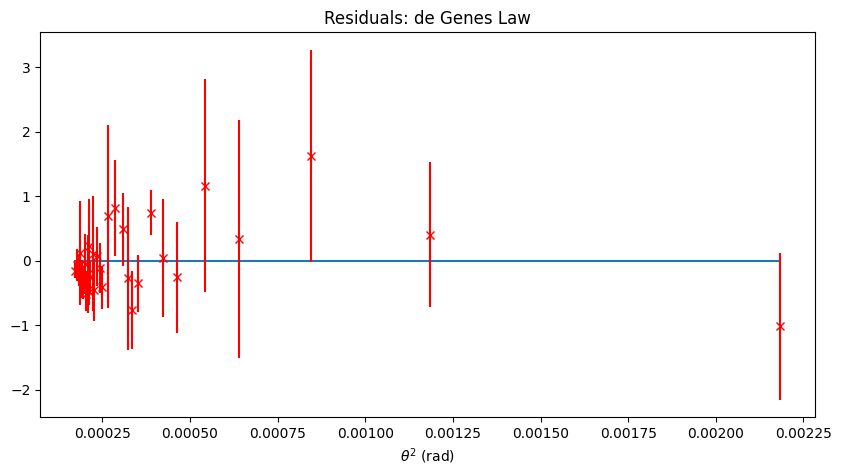

In [21]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (10,5)
plt.figure()

# plotting angle data vs. residuals
plt.plot(angle_quad, 0*quad_residuals)
plt.errorbar(angle_quad, quad_residuals, fmt="rx", yerr=error_velocity)

# setting axis labels, figures and title 
plt.xlabel(r"$\theta^2$ (rad)")
plt.title("Residuals: de Genes Law")

# displaying the plot
plt.show()

Below are plotted the Cox-Voinov law residuals

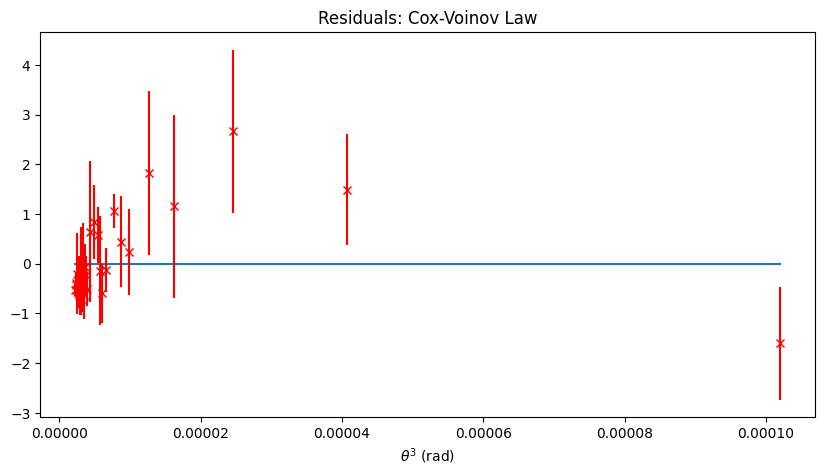

In [22]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (10,5)
plt.figure()

# plotting angle data vs. residuals
plt.plot(angle_cube, 0*cube_residuals)
plt.errorbar(angle_cube, cube_residuals, fmt="rx", yerr=error_velocity)

# setting axis labels, figures and title 
plt.xlabel(r"$\theta^3$ (rad)")
plt.title("Residuals: Cox-Voinov Law")

# displaying the plot
plt.show()

![](./img/bee.png)
## Drop Spreading Law Is

The results of the chi-squared analysis suggest that the de Gene's law is a better fit for the behaviour of the spreading drop because...

... the value of $\chi_R^2$ for de Gene's law is closer to 1 (i.e., $\chi^2 \sim N$ where $N$ are the number of degrees of freedom), data points for the de Gene's law appear to have lower residuals, and more of the error bars for the de Gene's law pass through the residual line than the Cox-Voinov law.

![](./img/bee.png)
## Stretch yourself section

This section is to be populated by you entirely 